Import requirments (liberaries)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

In [23]:
data = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\Breast Cancer Gene Expression.csv')
data.head()

C:\Users\DELL2025\AppData\Local\Temp\ipykernel_10188\1474623677.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\Breast Cancer Gene Expression.csv')


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = data[["patient_id", "age_at_diagnosis"]]
data.head()

,patient_id,age_at_diagnosis
0,0,75.65
1,2,43.19
2,5,48.87
3,6,47.68
4,8,76.97


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        1904 non-null   int64  
 1   age_at_diagnosis  1904 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.9 KB


In [26]:
data.describe()

,patient_id,age_at_diagnosis
count,1904.000000,1904.000000
mean,3921.982143,61.087054
std,2358.478332,12.978711
min,0.000000,21.930000
25%,896.500000,51.375000
50%,4730.500000,61.770000
75%,5536.250000,70.592500
max,7299.000000,96.290000


In [27]:
data.isna().sum()

patient_id          0
age_at_diagnosis    0
dtype: int64

In [28]:
samp = data[["patient_id", "age_at_diagnosis"]].sample(50).reset_index(drop=True)
samp

,patient_id,age_at_diagnosis
0,4274,74.32
1,7013,30.53
2,5403,85.94
3,2771,56.79
4,5184,79.76
5,4343,68.09
6,5601,61.73
7,6063,58.90
8,68,51.01
9,294,46.17


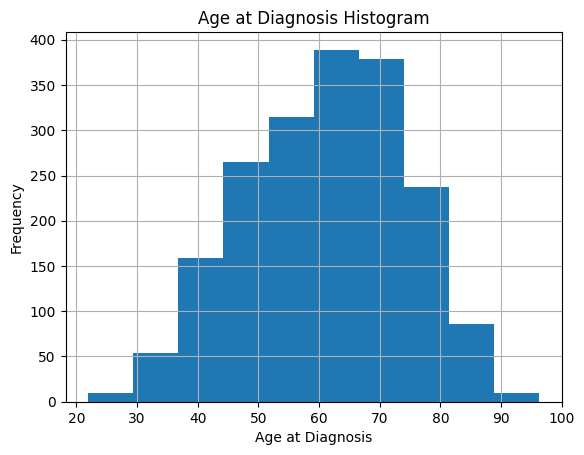

In [29]:
plt.figure()
data["age_at_diagnosis"].hist()
plt.title("Age at Diagnosis Histogram")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Frequency")
plt.savefig("age_at_diagnosis_histogram.png")

In [30]:
pop_mean = data["age_at_diagnosis"].mean()
pop_std = data["age_at_diagnosis"].std()

print(pop_mean, pop_std)

61.08705357142857 12.978711486507144


In [31]:
samp_mean = samp["age_at_diagnosis"].mean()
samp_std = samp["age_at_diagnosis"].std()       
samp_mean, samp_std

(np.float64(61.7644), np.float64(15.334750739575064))

In [32]:
zscores = (samp_mean - pop_mean) / (pop_std )
zscores

np.float64(0.05218903504216206)

In [33]:
crit_z = 1.96
crit_z > zscores

np.True_

there is no significate differances between sample and population mean so we cant reject null hypothesis

In [34]:
p_value = 1 - norm.cdf(zscores)
p_value

np.float64(0.47918903489845366)

In [35]:
p_value > 0.05

np.True_

there is no significate differances between sample and population mean so we cant reject null hypothesis

In [36]:
below_50 = (50 - samp_mean ) / samp_std
below_50    

np.float64(-0.7671725611841279)

In [37]:
# Calculate the percentage below 50
percent_below = norm.cdf(below_50) * 100

# Calculate the percentage above 50
percent_above = (1 - norm.cdf(below_50)) * 100

percent_below, percent_above

(np.float64(22.148946228272166), np.float64(77.85105377172783))

which mean that the percentage of the patients below 50 years is  22.15% using z-score table 

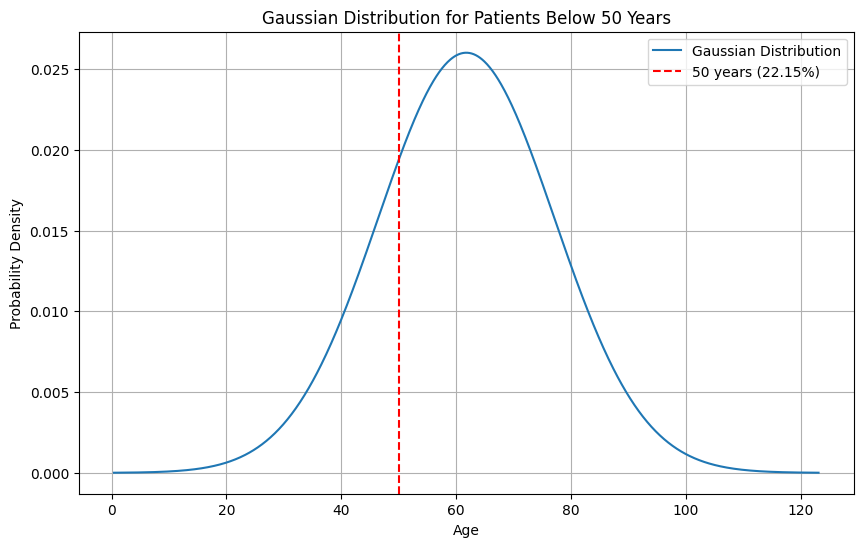

In [38]:
# Generate Gaussian distribution
mean = samp_mean
std = samp_std
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
pdf = norm.pdf(x, mean, std)

# Calculate percentage below 50 years
percent_below_50 = norm.cdf(50, mean, std) * 100

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Gaussian Distribution')
plt.axvline(50, color='red', linestyle='--', label=f'50 years ({percent_below_50:.2f}%)')
plt.title('Gaussian Distribution for Patients Below 50 Years')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

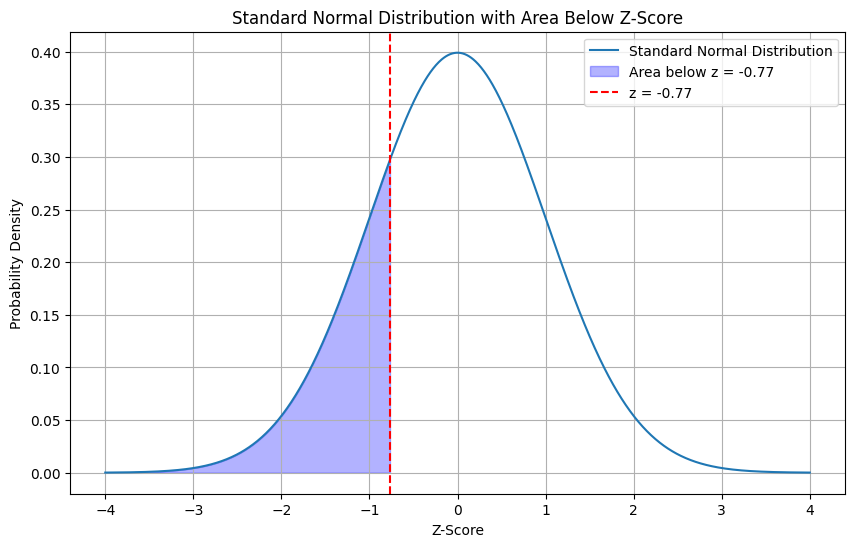

In [39]:
# Generate x values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x)

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Standard Normal Distribution')

# Highlight the area below the z-score
z = below_50  # Use the z-score for 50 years
x_fill = np.linspace(-4, z, 1000)
y_fill = norm.pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label=f'Area below z = {z:.2f}')

# Add labels and legend
plt.title('Standard Normal Distribution with Area Below Z-Score')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.axvline(z, color='red', linestyle='--', label=f'z = {z:.2f}')
plt.legend()
plt.grid()
plt.show()